# $K - Nearest Neighbours$

- you try to find the K number of nearest points to the input
- 
- k = number of neighbours
- k is very sensetive to noise 
- k cannot be high - it will include NOISE
- k cannot be small, it won't be able to CLASSIFY

supervised machine learning technique used for both `classification` and `regression` tasks

- https://www.geeksforgeeks.org/machine-learning/k-nearest-neighbours/
- https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/
- 

**CLUSTERING** - turning points into a cluster
- cluster is bunch of closely placed points
- But, clustering is exactly used, when we do not know what the classes are
- we use Clustering in `Un Supervised Learning` - where we do not know the labels, or target class

In [81]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [82]:
# load the data

iris = load_iris()

In [83]:
# Selected features and target 
X = iris.data
y = iris.target

In [84]:
# split the data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 10)

- algorithms, that are based on distance metrics, are very sensetive to Scale of the features
- if higher distances, that might change decisions drastically
- all features are in the same scale, so that they get the similar importance

In [85]:
# Scale our inputs
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

# for X_test you cannot use fit_transform() ------- because if you do ---- causes Data leakage into the model
# what your model was not supposed to see, it can see some of it then

In [86]:
# Modeling

knn = KNeighborsClassifier( n_neighbors = 5)

# fit the model with data to train

knn.fit(X_train_scaled, y_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [87]:
# build predictions
y_pred_knn = knn.predict(X_test_scaled)

In [88]:
print("Accuracy is: ", accuracy_score(y_test,y_pred_knn))
print("-"*50)
print("Classification Report")
print("-"*50)
print(classification_report(y_test,y_pred_knn))

Accuracy is:  0.9666666666666667
--------------------------------------------------
Classification Report
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



### How the algo works:
- how is `distance` calculated?
- what is the best value for `k`

#### Distance Metrics
1. Euclidean Distance
- calculate the magnitude of the straight line connecting two points
- $$ distance = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2} $$
2. Manhattan Distance
- goes in horizontal and vertical lines
- also called the taxi cab method
- $$ Manhanttan Distance = |x2 - x1| + |y2 - y1|$$

3. Minkowski Distance
- Minkowski distance is like a family of distances, which includes both Euclidean and Manhattan distances

at 2 exactly:
drop off around 4

### Choosing K
- try manually to change values of K

In [89]:

k_values = range(1,21) # iterable that goes from start values of k to end
# for first 20 values of k

accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train_scaled, y_train)

    y_test_knn = knn.predict(X_test_scaled)

    acc = accuracy_score(y_test,y_test_knn)
    accuracies.append(acc)

    print(f'K = {k:2} ------> accuracy = {acc:.4f}')

# choose a particular k
# k = 1

K =  1 ------> accuracy = 0.9667
K =  2 ------> accuracy = 0.9667
K =  3 ------> accuracy = 0.9667
K =  4 ------> accuracy = 0.9667
K =  5 ------> accuracy = 0.9667
K =  6 ------> accuracy = 0.9667
K =  7 ------> accuracy = 0.9333
K =  8 ------> accuracy = 0.9333
K =  9 ------> accuracy = 0.9333
K = 10 ------> accuracy = 0.9333
K = 11 ------> accuracy = 0.9333
K = 12 ------> accuracy = 0.9667
K = 13 ------> accuracy = 0.9667
K = 14 ------> accuracy = 0.9667
K = 15 ------> accuracy = 0.9667
K = 16 ------> accuracy = 1.0000
K = 17 ------> accuracy = 1.0000
K = 18 ------> accuracy = 1.0000
K = 19 ------> accuracy = 1.0000
K = 20 ------> accuracy = 1.0000


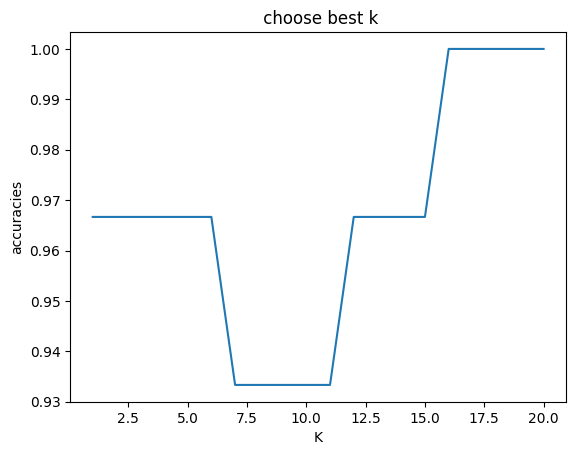

In [90]:
import matplotlib.pyplot as plt

plt.plot(k_values, accuracies)
plt.xlabel('K')
plt.ylabel('accuracies')
plt.title(' choose best k')
plt.show()

##### Elbow Method

![Elbow method](https://www.researchgate.net/profile/Adria_Binte_Habib/publication/352823947/figure/fig1/AS:1040051081322497@1624978909314/Elbow-method-using-distortion_Q640.jpg)

- choose the point of inflection for `k`

K =  1 ------> accuracy = 1.0000
K =  2 ------> accuracy = 1.0000
K =  3 ------> accuracy = 1.0000
K =  4 ------> accuracy = 1.0000
K =  5 ------> accuracy = 1.0000
K =  6 ------> accuracy = 1.0000
K =  7 ------> accuracy = 1.0000
K =  8 ------> accuracy = 1.0000
K =  9 ------> accuracy = 1.0000
K = 10 ------> accuracy = 1.0000
K = 11 ------> accuracy = 1.0000
K = 12 ------> accuracy = 1.0000
K = 13 ------> accuracy = 1.0000
K = 14 ------> accuracy = 1.0000
K = 15 ------> accuracy = 1.0000
K = 16 ------> accuracy = 1.0000
K = 17 ------> accuracy = 1.0000
K = 18 ------> accuracy = 1.0000
K = 19 ------> accuracy = 1.0000
K = 20 ------> accuracy = 1.0000


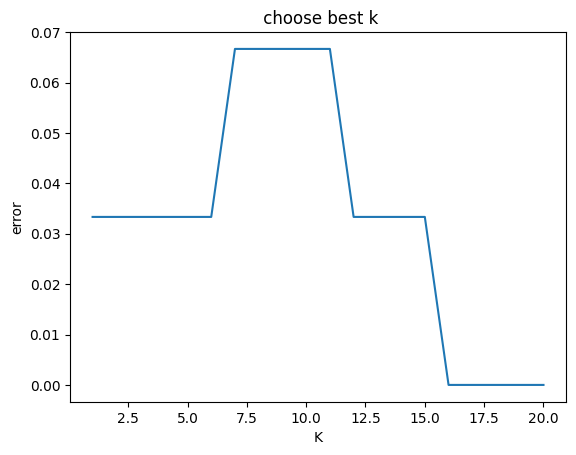

In [93]:

k_values = range(1,21) # iterable that goes from start values of k to end
# for first 20 values of k

error = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train_scaled, y_train)

    y_test_knn = knn.predict(X_test_scaled)

    err =  1 - (accuracy_score(y_test,y_test_knn))

    error.append(err)

    print(f'K = {k:2} ------> accuracy = {acc:.4f}')


plt.plot(k_values, error)
plt.xlabel('K')
plt.ylabel('error')
plt.title(' choose best k')
plt.show()

# choose a particular k
# k = 1



#### Exercise:

- Use `from sklearn.neighbors import KNeighborsRegressor` model to make predictions
- Create a model, that is able to make House Price Predictions
- Use data from sklearn.datasets `data = fetch_california_housing()`
- Find the best value of K using elbow method
- And use that for final model accuracies

In [ ]:
# Please write YES in chat if you can do this!!